In [1]:
# scipy link: https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.eig.html
from scipy import linalg
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import nbinom

In [14]:
# G0 will be the NGM assuming that it is multiplied by [s1,s2,s3,s4]^T
G0 = np.array([[1,1,1,1],[2,2,2,2],[3,3,3,3],[4,4,4,4]])
B = linalg.eigvals(G0*1/3)
B

array([ 0.00000000e+00+0.j,  3.33333333e+00+0.j, -7.47323116e-17+0.j,
        4.65106203e-17+0.j])

In [15]:
R0 = 1.5
C = R0/max(B)
C

(0.44999999999999996+0j)

In [204]:
def GroupedInfections(i0,s0,Tmax,dt):
    T = np.arange(0,Tmax+dt,dt)
    s1 = np.zeros(len(T))
    s2 = np.zeros(len(T))
    s3 = np.zeros(len(T))
    s4 = np.zeros(len(T))
    
    i1 = np.zeros(len(T))
    i2 = np.zeros(len(T))
    i3 = np.zeros(len(T))
    i4 = np.zeros(len(T))
    
    r1 = np.zeros(len(T))
    r2 = np.zeros(len(T))
    r3 = np.zeros(len(T))
    r4 = np.zeros(len(T))
    
    C = 0.44999999999999996
    #C = 20
    p1 = 1
    p2 = 2
    p3 = 3
    p4 = 4
    
    w = 1/4
    g = 3
    for x,t in enumerate(T):
        if x == 0:
            s1[x] = s0/4
            s2[x] = s0/4
            s3[x] = s0/4
            s4[x] = s0/4
            
            i1[x] = i0/4
            i2[x] = i0/4
            i3[x] = i0/4
            i4[x] = i0/4
            
            r1[x] = 0
            r2[x] = 0
            r3[x] = 0
            r4[x] = 0
            
        else:
            ds1 = -C * p1 * 1/w* (i1[x-1]+i2[x-1]+i3[x-1]+i4[x-1])*s1[x-1]
            ds2 = -C * p2 * 1/w* (i1[x-1]+i2[x-1]+i3[x-1]+i4[x-1])*s2[x-1]
            ds3 = -C * p3 * 1/w* (i1[x-1]+i2[x-1]+i3[x-1]+i4[x-1])*s3[x-1]
            ds4 = -C * p4 * 1/w* (i1[x-1]+i2[x-1]+i3[x-1]+i4[x-1])*s4[x-1]
            
            di1 = C * p1 *1/w* (i1[x-1]+i2[x-1]+i3[x-1]+i4[x-1])*s1[x-1] - g*i1[x-1]
            di2 = C * p2 * 1/w* (i1[x-1]+i2[x-1]+i3[x-1]+i4[x-1])*s2[x-1] - g*i2[x-1]
            di3 = C * p3 * 1/w* (i1[x-1]+i2[x-1]+i3[x-1]+i4[x-1])*s3[x-1] - g*i3[x-1]
            di4 = C * p4 * 1/w* (i1[x-1]+i2[x-1]+i3[x-1]+i4[x-1])*s4[x-1] - g*i4[x-1]
            
            dr1 = g*i1[x-1]
            dr2 = g*i2[x-1]
            dr3 = g*i3[x-1]
            dr4 = g*i4[x-1]
            
            s1[x] = s1[x-1] + dt*ds1
            s2[x] = s2[x-1] + dt*ds2
            s3[x] = s3[x-1] + dt*ds3
            s4[x] = s4[x-1] + dt*ds4
            
            i1[x] = i1[x-1] + dt*di1
            i2[x] = i2[x-1] + dt*di2
            i3[x] = i3[x-1] + dt*di3
            i4[x] = i4[x-1] + dt*di4
            
            r1[x] = r1[x-1] + dt*dr1
            r2[x] = r2[x-1] + dt*dr2
            r3[x] = r3[x-1] + dt*dr3
            r4[x] = r4[x-1] + dt*dr4
            
    return i1,i2,i3,i4,T,s1,s2,s3,s4

In [211]:
s0 = 0.999
i0 = 0.001
Tmax = 10
dt = 0.001
i1,i2,i3,i4,T,s1,s2,s3,s4 = GroupedInfections(i0,s0,Tmax,dt)

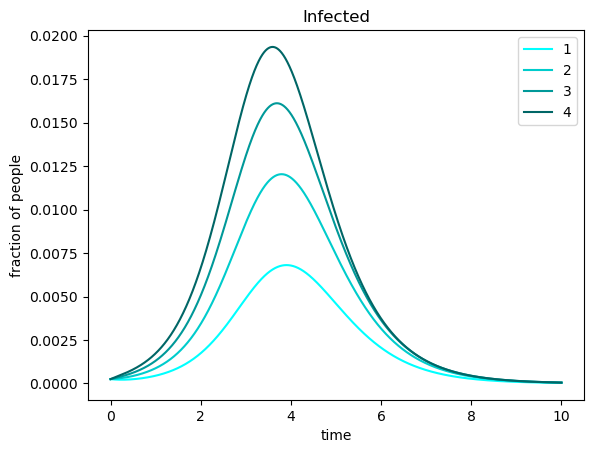

In [261]:
fig, ax = plt.subplots()

base_color = np.array([0,1,1])
color2 = base_color*0.8
color3 = base_color*0.6
color4 = base_color*0.4

ax.plot(T, i1,label="1",color = base_color)
ax.plot(T, i2,label="2",color = color2)
ax.plot(T,i3,label="3",color = color3)
ax.plot(T,i4,label="4",color = color4)

# base_color = np.array( [0,0,1] )
# color = base_color (*0.8, *0.6)

ax.set(xlabel='time', ylabel='fraction of people',
       title='Infected')
ax.legend()

[Text(0.5, 0, 'time'),
 Text(0, 0.5, 'Average Suceptibility'),
 Text(0.5, 1.0, 'Average relative susceptibility among the susceptibles')]

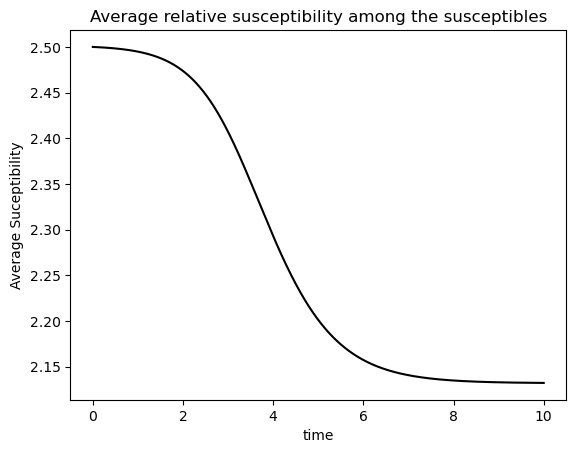

In [255]:
#p of t
p = (s1*1+s2*2+s3*3+s4*4)/(s1+s2+s3+s4)

fig, ax = plt.subplots()
ax.plot(T, p,label="1",color ="k")
ax.set(xlabel='time', ylabel='Average Suceptibility',
       title='Average relative susceptibility among the susceptibles')


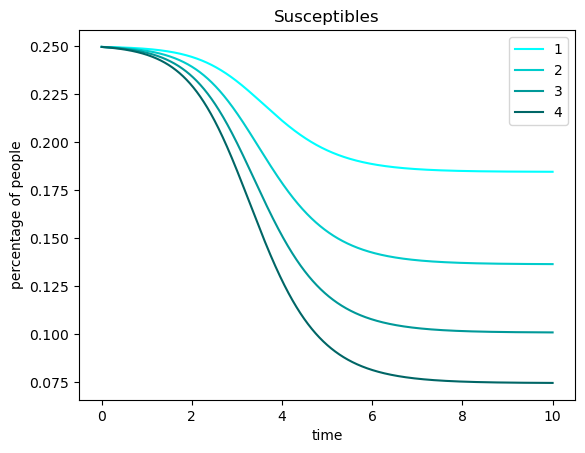

In [256]:
#print((s1[-1]*1+s2[-1]*2+s3[-1]*3+s4[-1]*4)/(s1[-1]+s2[-2]+s3[-3]+s4[-4]))


fig, ax = plt.subplots()

base_color = np.array([0,1,1])
color2 = base_color*0.8
color3 = base_color*0.6
color4 = base_color*0.4

ax.plot(T, s1,label="1",color = base_color)
ax.plot(T, s2,label="2",color = color2)
ax.plot(T,s3,label="3", color = color3)
ax.plot(T,s4,label="4",color = color4)


ax.set(xlabel='time', ylabel='percentage of people',
       title='Susceptibles')
ax.legend()

In [99]:
from scipy.stats import nbinom
k = 10000 # Dispersion Parameter k
R0 = 3 # Mean R0
mean = R0
variance = mean + (mean**2)/k
p = mean/variance
n = mean**2 / (variance - mean)
draw = nbinom.rvs(n=n,p=p)
draws = nbinom.rvs(n=n,p=p,size=10)

In [101]:
draws

array([5, 1, 0, 1, 2, 1, 4, 3, 3, 3], dtype=int64)

In [166]:
def GenerationsBranchingPoissons(R0,gen):
    #number of infections we start with
    z_0 = 1
    #initialize the list
    z = []
    z.append(z_0)
    
    for g in range(gen):
        totalNum = 0
        if z[-1] == 0:
            break
        for item in range(z[-1]):
            # draw from poisson for each of people
            rand = np.random.poisson(R0)
            # add up all those draws
            totalNum = totalNum + rand
            # store that number in z vector
        z.append(totalNum)
    
    
    if z[-1] == 0:
        q = 0
    else:
        q = 1
    return z,q

In [167]:
GenerationsBranchingPoissons(2,2) #did this die early or keep going

([1, 1, 0], 0)

In [194]:
Total = 0
runs = 10000
for i in range(runs):
    z, q = GenerationsBranching(3,1)
    Total = Total + q

Average = Total/runs
Average

0.9511

In [171]:
def GenerationsBranchingNB(k,generations):
    #number of infections we start with
    z_0 = 1
    #initialize the list
    z = []
    z.append(z_0)
    # Dispersion Parameter k
    R0 = 3 # Mean R0
    mean = R0
    variance = mean + (mean**2)/k
    p = mean/variance
    n = mean**2 / (variance - mean)
    #draws = nbinom.rvs(n=n,p=p,size=10)
    
    for g in range(generations):
        total_new_infections = 0
        if z[-1] == 0:
            break
        for item in range(z[-1]):
            # draw from poisson for each of people
            draw = nbinom.rvs(n=n,p=p)
            
            # add up all those draws
            total_new_infections = total_new_infections + draw
            # store that number in z vector
        z.append(totalNum)
    
    
    if z[-1] == 0:
        q = 0
    else:
        q = 1
    return z,q

In [4]:
def GenerationsBranchingNB2(k,generations):
    #number of infections we start with
    z_0 = 1
    #initialize the list
    z = []
    z.append(z_0)
    
    
    
     # Dispersion Parameter k
    R0 = 3 # Mean R0
    mean = R0
    variance = mean + (mean**2)/k
    p = mean/variance
    n = mean**2 / (variance - mean)
    #draws = nbinom.rvs(n=n,p=p,size=10)
    
    for g in range(generations):
        #first set a new number of infections for a generation
        total_new_infections = 0
        if z[-1] == 0:
            #stop the code
            break
        else:
            # draw from poisson for each of people
            draws = nbinom.rvs(n=n,p=p,size=z[-1])
            
            # add up all those draws
            total_new_infections = total_new_infections + sum(draws)
            # store that number in z vector
        z.append(total_new_infections)
    
    
    if z[-1] == 0:
        #then our infection died out before it could hit the final generation
        q = 0
    else:
        q = 1
    return z,q

In [252]:
GenerationsBranchingNB2(10,10)

([1, 4, 19, 55, 163, 492, 1419, 4245, 12703, 37900, 113835], 1)

In [262]:
def averagingRuns(runs,k,generations):
    total = 0
    for i in range(runs):
        z,q = GenerationsBranchingNB2(k,generations)
        total = total + q
    return(total/runs)

In [264]:
1-averagingRuns(1000,0.1,10)

0.836

In [265]:
1-averagingRuns(1000,0.5,10)

0.492

In [266]:
1-averagingRuns(1000,1,10)

0.34199999999999997

In [267]:
1-averagingRuns(1000,5,10)

0.125

In [268]:
1-averagingRuns(1000,10,10)

0.07999999999999996

In [254]:
Total = 0
runs = 1000
for i in range(runs):
    z, q = GenerationsBranchingNB2(0.1,10)
    Total = Total + q

Average = Total/runs
Average

0.169

In [42]:
def GenerationsHistPlotterNB2(k,generations):
    #number of infections we start with
    z_0 = 1
    #initialize the list
    z = []
    z.append(z_0)
    
    
    
     # Dispersion Parameter k
    R0 = 3 # Mean R0
    mean = R0
    variance = mean + (mean**2)/k
    p = mean/variance
    n = mean**2 / (variance - mean)
    #draws = nbinom.rvs(n=n,p=p,size=10)
    
    for g in range(generations):
        #first set a new number of infections for a generation
        total_new_infections = 0
        if z[-1] == 0:
            #stop the code
            break
        elif z[-1] >= 100000:
            break
        else:
            # draw from poisson for each of people
            draws = nbinom.rvs(n=n,p=p,size=z[-1])
            
            # add up all those draws
            total_new_infections = total_new_infections + sum(draws)
            # store that number in z vector
        z.append(total_new_infections)
    
    
    if z[-1] == 0:
        #then our infection died out before it could hit the final generation
        q = 0
    else:
        q = 1
    return z,q

In [73]:
GenerationsBranchingNB2(0.1,5)

([1, 5, 14, 2, 0], 0)

(array([7.5848e+04, 2.1310e+03, 1.3110e+03, 8.7400e+02, 1.0900e+03,
        3.4700e+02, 2.7100e+02, 2.4700e+02, 1.9200e+02, 2.9600e+02,
        1.2100e+02, 8.9000e+01, 7.9000e+01, 1.5700e+02, 6.6000e+01,
        4.6000e+01, 4.3000e+01, 3.5000e+01, 6.7000e+01, 3.0000e+01,
        1.6000e+01, 1.7000e+01, 2.8000e+01, 7.0000e+00, 8.0000e+00,
        9.0000e+00, 6.0000e+00, 1.2000e+01, 4.0000e+00, 3.0000e+00,
        7.0000e+00, 8.0000e+00, 5.0000e+00, 2.0000e+00, 3.0000e+00,
        0.0000e+00, 3.0000e+00, 4.0000e+00, 1.0000e+00, 1.0000e+00,
        4.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        4.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([ 1.  ,  2.22,  3.44,  4.66,  5.88,  7.1 ,  8.32,  9.54, 10.76,
        11.98, 13.2 , 14.42, 15.64, 16.86, 18.08, 19.3 , 20.52, 21.74,
        22.96, 24.18, 25.4 , 26.62, 27.84, 29.06, 30.28, 31.5 , 32.72,
        33.94, 35.16, 36.38, 37.6 , 38.82, 40.04, 41.26, 42.48, 43.7 ,
        44.92, 46.14, 47.36, 48.58

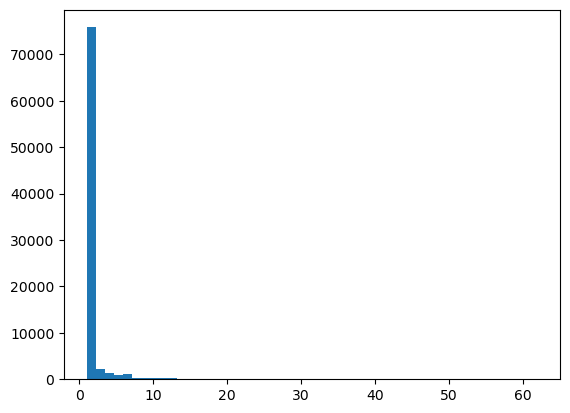

In [75]:
outbreaks = 100000
outbreaksize = []
for outbreak in range(outbreaks):
    z,q = GenerationsHistPlotterNB2(0.1,5)
    if q == 0:
        outbreaksize.append(sum(z))

plt.hist(outbreaksize,bins=50)

Text(0.5, 1.0, 'frequency of finite outbreaks, k = 0.1')

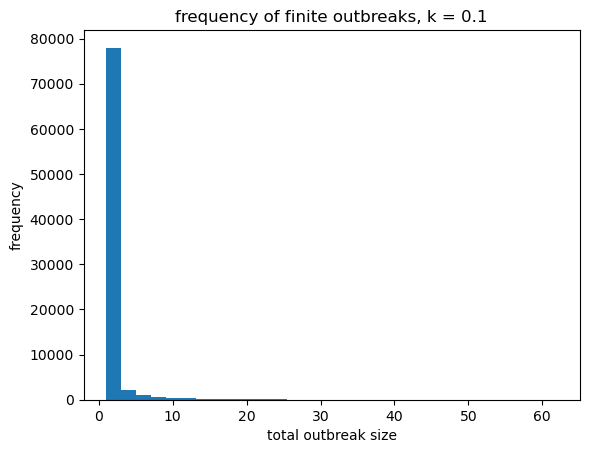

In [82]:
plt.hist(outbreaksize,bins=30)
plt.xlabel("total outbreak size")
plt.ylabel("frequency")
plt.title("frequency of finite outbreaks, k = 0.1")

In [83]:
outbreaks = 100000
outbreaksize2 = []
for outbreak in range(outbreaks):
    z,q = GenerationsHistPlotterNB2(1,5)
    if q == 0:
        outbreaksize2.append(sum(z))



Text(0.5, 1.0, 'frequency of finite outbreaks, k = 1')

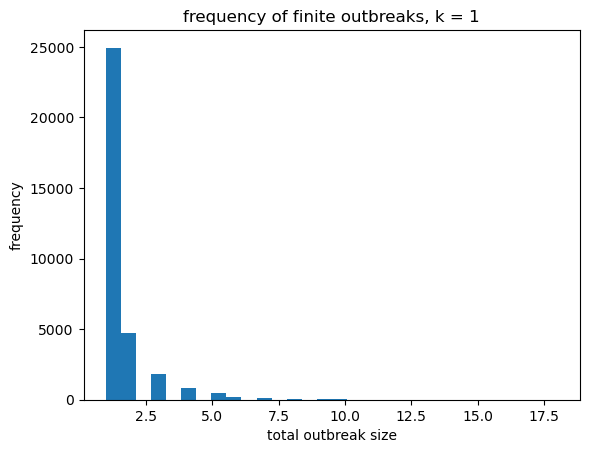

In [91]:
plt.hist(outbreaksize2,bins=30)
plt.xlabel("total outbreak size")
plt.ylabel("frequency")
plt.title("frequency of finite outbreaks, k = 1")
